##The Perceptron -- A summary


$$y=\sum_{i = 0}^{n} {w_i x_i} = \vec{w} \cdot \vec{x} \tag {1}$$

$$z(y) = \begin{cases} 
      0 & y\leq 0 \\
      1 & y\gt 0
\end{cases} \tag {2}$$

where the $(x_0, x_1, ..., x_{n-1})$ are the inputs, with different weights $(w_0, w_1, ..., w_{n-1})$ for each of them, respectively.  $x_n$ is the bias, with a constant value of 1, and with weight $w_n$.  $z$ is the output of the perceptron.

Then compare $z$ with a desired output: $d(\vec{x})$.  Depending on how $z$ is different from $d$, we will adjust the $\vec{w}$ to move $z$ closer and closer to $d$.  This is the training process to determine the weights.

Once a perceptron is trained, it can then produce an output given a set of previously unseen inputs.

## Simple Example:

## A perceptron that performs the NOR operation on two inputs:

| $x_0$ | $x_1$ | $z$   |
|:-:    |:-:    |:-:    |   
|   0   |   0   |   1   |
|   0   |   1   |   0   |
|   1   |   0   |   0   |
|   1   |   1   |   0   |

 



## As we talked about last time, to the two real inputs, $x_0$ and $x_1$, we add one more input $x_2$ with a constant value of 1, and an associated weight $w_2$ -- this is the bias.  



In [1]:
%matplotlib inline
# All imports
from __future__ import print_function
from random import choice
import numpy as np
import matplotlib.pyplot as plt


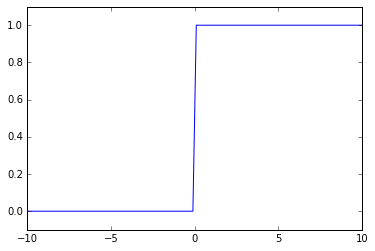

In [2]:
'''
step function

We anticipate its generalized utility in a classifier; 

hence, in the lambda function, 1.*(x > 0)
''' 
step_fun = lambda x: x > 0 
x = np.linspace(-10, 10, 100)
z = step_fun(x)
plt.plot(x, z)
plt.ylim(-.1, 1.1)
plt.show()

In [3]:
'''
Perceptron to implement the NOR operation


'''

training_data = [
    (np.array([0,0,1]), 1),
    (np.array([0,1,1]), 0),
    (np.array([1,0,1]), 0),
    (np.array([1,1,1]), 0),
]

# usu. random numbers for weights is not a bad starting point
w = np.random.rand(3)
errors = []

# "learning rate"
alfa = 0.2

# use 100 training steps
n = 100
# w.history = []
for i in xrange(n):
    x, target = choice(training_data)
    y = np.dot(w, x)
    z = step_fun(y)
    error = target - z
    errors.append(error)
    w += alfa * error * x

print('weights:', w)
    
for x, _ in training_data:
    y = np.dot(x, w)
    # not including the bias, x[3]
    print("{}: {} -> {}".format(x[:2], y, step_fun(y)))

weights: [-0.23159391 -0.26003336  0.19740578]
[0 0]: 0.197405783594 -> True
[0 1]: -0.0626275806823 -> False
[1 0]: -0.0341881313492 -> False
[1 1]: -0.294221495626 -> False


## Now, the key step: 

     w += alfa * error * x
     
## It's really quite simple:

If the target is higher than the output of the perceptron ($z$), then the weights need to be increased -- see eq (1) and (2); remember the $x_i$'s are non-negative.

Conversely, if the target is lower than the output of the perceptron ($z$), then the weights need to be decreased.

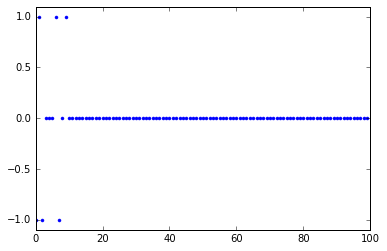

In [4]:
'''
Note that since both target and z are always either 0 or 1,
the error values (= target - z) will only have values 1, -1, or 0.

As we talked about above, if an error is 1, weight need to be increased
to make y higher and therefore z higher (from 0 to 1), and vice versa.

'''

plt.plot(np.arange(n), errors, '.')
plt.ylim(-1.1, 1.1)
plt.xlim(0, 100)
plt.show()

## Let's turn this into a classifier!!

In [5]:
'''
Perceptron to implement the NOR operation

There are lots of subtlties here.


'''
def NOR_perceptron_classifier(x, show_train = False):    
    training_data = [
        (np.array([0,0,1]), 1),
        (np.array([0,1,1]), 0),
        (np.array([1,0,1]), 0),
        (np.array([1,1,1]), 0),
    ]

    # usu. random numbers for weights is not a bad starting point
    w = np.random.rand(3)
    errors = []

    # "learning rate"
    alfa = 0.2

    # use 100 training steps
    n = 100
    # w.history = []
    for i in xrange(n):
        x_train, target = choice(training_data)
        y = np.dot(w, x_train)
        error = target - step_fun(y)
        errors.append(error)
        w += alfa * error * x_train
    
    if show_train:
        print('weights:', w)
        print('Training results:')
        for x_train, _ in training_data:
            y = np.dot(x_train, w)
            print("{}: {} -> {}".format(x_train[:2], y, step_fun(y)))
    
    x = np.append(x, 1)
    return step_fun(np.dot(x, w)), w

## Breakout Exercise: 

- ## Add a function training(training_data, show_train = False) that returns the trained w.

- ## Call the function training from inside NOR_perceptron_classifier(x, w_trained = None, show_train = False)

     - If w_trained = None, call the function training.  What training returns should be stored in a variable called w_trained inside NOR_perceptron_classifier.
       
     - Or, w_trained can be supplied when NOR_perceptron_classifier is called.  Then training will not be called.

In [6]:
'''
Perceptron to implement the NOR operation

There are lots of subtlties here.


'''
def training(training_data, show_train = False):
    # usu. random numbers for weights is not a bad starting point
    w = np.random.rand(3)
    errors = []

    # "learning rate"
    alfa = 0.2

    # use 100 training steps
    n = 100
    # w.history = []
    for i in xrange(n):
        x_train, target = choice(training_data)
        y = np.dot(w, x_train)
        error = target - step_fun(y)
        errors.append(error)
        w += alfa * error * x_train

    if show_train:
        print('weights:', w)
        print('Training results:')
        for x_train, _ in training_data:
            y = np.dot(x_train, w)
            print("{}: {} -> {}".format(x_train[:2], y, step_fun(y)))

    return w

def NOR_perceptron_classifier(x, w_trained = None, show_train = False):    
    training_data = [
        (np.array([0,0,1]), 1),
        (np.array([0,1,1]), 0),
        (np.array([1,0,1]), 0),
        (np.array([1,1,1]), 0),
    ]

    if w_trained == None:
        w_trained = training(training_data, show_train = show_train)
    
    x = np.append(x, 1)
    return step_fun(np.dot(x, w_trained)), w_trained

In [7]:
z, _ = NOR_perceptron_classifier(np.array([0.2, 0.2]))
print(z)

False


## ## Breakout from last time: Try 20 pairs of random numbers between [0, 1]

- ## Classify them according their "z" value.

- ## Plot them, with color coding according their "z" value.


/Users/labuser/Library/Enthought/Canopy_64bit/User/lib/python2.7/site-packages/ipykernel/__main__.py:43: FutureWarning: comparison to `None` will result in an elementwise object comparison in the future.


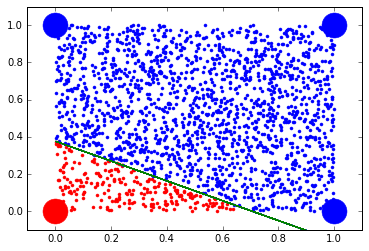

In [13]:
'''
Breakout Solution -- give it to the students

'''
x_arr = np.random.rand(2000, 2)

z_arr = np.array([])
for i, x in enumerate(x_arr):
    if i == 0:
        z, w_trained = NOR_perceptron_classifier(x)
    else:
        z, _ = NOR_perceptron_classifier(x, w_trained = w_trained)
    z_arr = np.append(z_arr, z)

for i, x in enumerate(x_arr):
    if z_arr[i]:
        plt.plot(x[0], x[1], 'r.')
    else:
        plt.plot(x[0], x[1], 'b.')
        
bound = (-w_trained[0]*x_arr - w_trained[2])/w_trained[1]

plt.plot(x_arr, bound)
plt.plot(0, 0, 'r.', ms = 50.)
plt.plot(0, 1, 'b.', ms = 50.)
plt.plot(1, 0, 'b.', ms = 50.)
plt.plot(1, 1, 'b.', ms = 50.)
plt.xlim(-.1, 1.1)
plt.ylim(-.1,1.1)
plt.show()

## Breakout: Try 200 pairs of random numbers between [0, 1]

- ## Classify them according their "z" value.

- ## Plot them, with color coding according their "z" value.

- ## Plot the four training points using large symbols, also color coded according their "z" values.  For inspiration:

       http://matplotlib.org/api/pyplot_api.html

- ## Plot the decision boundary (a line) using w.

In [146]:
'''How about a number outside the box?'''
z, _ = NOR_perceptron_classifier(np.array([3, 4]))
print(z)

False


## In the simple example above, we figured out how to adjust the weights pretty easily.

## For a more complicated problem, it's not obvious how the weights should be adjusted.

## Let's now take a systematic approach.  Starting with the simplest possible perceptron...

## Suppose there is only one input x, and therefore one weight, $w$.

## Then 

##$$y = wx$$

## And 

##$$z = \text{step_fun} (y)$$

## Suppose the desired output is $d$.

## Then we can define a performance function

##$$P = \frac{1}{2} (d - z)^2$$

## Obviously we would like to minimize $P$.

## Clearly $P$ is a function of $w$, $P(w)$.

## So we can phrase the question in the following way: find the value of $w$ that will minimize $P$.

## If you are given a problem like that in Calculus I, how would you approach it?

## $$ \frac{dP} {dw} = 0$$

## Except, $P$ doesn't directly depend on $w$.  Instead it depends on $z$, and $z$ depends on $y$, and finally $y$ depends directly on $w$.  So

##$$ \frac{dP} {dw} = \frac{dP} {dz} \frac{dz} {dy} \frac{dy} {dw}$$

## OK, let's compute the derivatives one at a time:

##$$ \frac{dP} {dz} = d - z$$

## and 

##$$ \frac{dy} {dw} = x$$

## But what about 

##$$ \frac{dz} {dy} = ?$$

## The step function has a discontinuity at $y = 0$!!  You can't take derivative across a discontinuity!!

## Introduce the sigmoid function:

##$$ f(y) = \frac{1}{1 + e^{-\alpha y}}$$

## Breakout Exercise: 
- ## Write a function, sigmoid(y, alpha = 1).
- ## Plot the sigmoid function, with alpha equal to its default value of 1.  Ask yourself, does this function behave according to your expectation?
- ## Plot the simoid function with 5 different alpha's, [1, 3, 5, 7, 9]

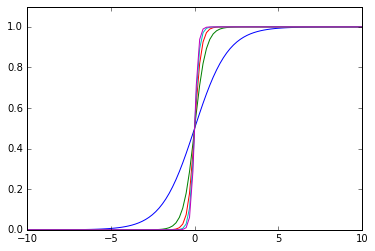

In [23]:
def sigmoid(y, alpha=1):
    return 1./(1+np.exp(-alpha*y))

y = np.linspace(-10, 10, 100)
lst = [1, 3, 5, 7, 9]
for i in lst:
    plt.plot(y, sigmoid(y, i))
plt.ylim(0, 1.1)
plt.show()

## The sigmoid function is perfectly differentiable.

## Breakout Exercise: Find the derivative of the sigmoid function by hand.  You may set $\alpha$ to be 1.

## Remember, $z$ is just $S$ with $\alpha = 1$.  So now we have an analytical expression for $\frac{dP} {dw}$!

## Lab Breakout Exercise: A general perceptron classifier:

- ## It should take as an argument, training_data, and also the test data, x_test:

     perceptron_classifier(x_test, training_data = None, w_trained = None, show_train = False)
     
     
- ## It return the z value and w_trained for x_test.

- ## Apply this general perceptron to the following three training data sets: the AND, the "Down the middle", the XOR.  The truth tables are provided below.


/Users/labuser/Library/Enthought/Canopy_64bit/User/lib/python2.7/site-packages/ipykernel/__main__.py:27: FutureWarning: comparison to `None` will result in an elementwise object comparison in the future.
/Users/labuser/Library/Enthought/Canopy_64bit/User/lib/python2.7/site-packages/ipykernel/__main__.py:29: FutureWarning: comparison to `None` will result in an elementwise object comparison in the future.


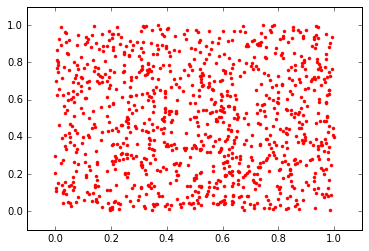

In [35]:
NOR = [
        (np.array([0,0,1]), 1),
        (np.array([0,1,1]), 0),
        (np.array([1,0,1]), 0),
        (np.array([1,1,1]), 0),
    ]
AND = [
        (np.array([0,0,1]), 0),
        (np.array([0,1,1]), 0),
        (np.array([1,0,1]), 0),
        (np.array([1,1,1]), 1),
    ]
DTM = [
        (np.array([0,0,1]), 0),
        (np.array([0,1,1]), 0),
        (np.array([1,0,1]), 1),
        (np.array([1,1,1]), 1),
    ]
XOR = [
        (np.array([0,0,1]), 0),
        (np.array([0,1,1]), 1),
        (np.array([1,0,1]), 1),
        (np.array([1,1,1]), 0),
    ]

def perceptron_classifier(x_test, training_data = None, w_trained = None, show_train = False):
    if training_data == None and w_trained == None:
        raise Exception("Supply training data please!")
    elif w_trained == None:
        w_trained = np.random.rand(3)
        errors = []

        alfa = 0.2

        n = 100
        
        for i in xrange(n):
            x_train, target = choice(training_data)
            y = np.dot(w_trained, x_train)
            error = target - step_fun(y)
            errors.append(error)
            w_trained += alfa * error * x_train

        if show_train:
            print('weights:', w_trained)
            print('Training results:')
            for x_train, _ in training_data:
                y = np.dot(x_train, w_trained)
                print("{}: {} -> {}".format(x_train[:2], y, step_fun(y)))
    
    x_test = np.append(x_test, 1)
    return step_fun(np.dot(x_test, w_trained)), w_trained

x_arr = np.random.rand(1000, 2)

data_set = XOR     #Training data supplied here

plt.figure()

z_arr = np.array([])
for i, x in enumerate(x_arr):
    if i == 0:
        z, w_trained = perceptron_classifier(x, training_data = data_set)
    else:
        z, _ = perceptron_classifier(x, w_trained = w_trained)
    z_arr = np.append(z_arr, z)

for i, x in enumerate(x_arr):
    if z_arr[i]:
        plt.plot(x[0], x[1], 'r.')
    else:
        plt.plot(x[0], x[1], 'b.')
        
bound = (-w_trained[0]*x_arr - w_trained[2])/w_trained[1]
plt.plot(x_arr, bound)
plt.xlim(-.1, 1.1)
plt.ylim(-.1, 1.1)

plt.show()

## Truth Table for AND:
| $x_0$ | $x_1$ | $z$   |
|:-:    |:-:    |:-:    |   
|   0   |   0   |   0   |
|   0   |   1   |   0   |
|   1   |   0   |   0   |
|   1   |   1   |   1   |

## Truth Table for "Down the middle":
| $x_0$ | $x_1$ | $z$   |
|:-:    |:-:    |:-:    |   
|   0   |   0   |   0   |
|   0   |   1   |   0   |
|   1   |   0   |   1   |
|   1   |   1   |   1   |

## XOR: 

## Exclusive OR is a logical operation that outputs true only when inputs differ (one is true, the other is false).

## Truth Table for XOR
| $x_0$ | $x_1$ | $z$   |
|:-:    |:-:    |:-:    |   
|   0   |   0   |   0   |
|   0   |   1   |   1   |
|   1   |   0   |   1   |
|   1   |   1   |   0   |

## End of Week 6-2